In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout,Conv1D, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns
import xgboost as xgb
import sklearn.svm as svm 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
from scipy.interpolate import make_interp_spline
import numpy as np
from sklearn.metrics import jaccard_score

In [2]:
input_data = pd.read_csv("/kaggle/input/segment-time-series/Final_inputs_4.csv")
output_data = pd.read_csv("/kaggle/input/segment-time-series/Final_outputs_4.csv")

In [3]:
input_data

,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,...,img28,img29,img30,img31,img32,img33,img34,img35,img36,img37
0,-1.239142,1.498891,-0.473891,2.732457,-1.775369,2.018271,0.878624,0.189638,-3.116104,0.704959,...,2.981228,-0.287656,0.574405,-0.458697,-0.802391,2.912138,-0.505372,-0.062667,-2.031613,-1.328224
1,2.574738,-2.062863,5.398529,7.057920,-6.506147,-0.266727,2.404262,3.955059,-2.694261,0.519040,...,1.727434,4.436107,3.819314,-3.347995,0.624544,-1.255513,3.438749,1.159636,1.612793,3.188694
2,-0.349369,0.966855,-0.973846,1.972532,-1.548146,2.045534,-0.396231,-1.012574,-0.740672,0.159815,...,1.543536,-0.081525,1.830645,0.219379,0.879495,0.889782,-1.249124,-1.037224,-1.078819,-0.835310
3,-2.361752,5.785539,-0.705231,10.028336,-4.037800,0.293847,-0.193063,-2.664406,0.030713,0.171018,...,3.376617,-1.285622,7.925495,-4.532014,8.761567,1.128161,0.996844,0.033296,2.039350,-4.789645
4,-0.013275,1.999355,0.181871,1.926223,0.408957,2.354265,0.389001,-2.391864,-1.995376,0.866367,...,1.929570,0.335299,2.575144,1.572074,0.640372,0.690192,0.365129,0.956321,-1.613944,0.301307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,0.846497,2.147211,2.059639,-3.180419,-1.287810,0.233190,-2.042279,-1.245020,-0.205599,0.766990,...,-3.409642,0.967784,2.792274,1.882319,-0.278658,-0.840221,2.576162,-2.052246,-0.175842,-0.905137
3605,1.646910,3.769119,2.164775,-3.303450,0.056773,1.809287,-3.074306,-2.480639,-2.745012,-3.757234,...,-4.259931,-1.530180,4.193364,3.579149,-0.652219,-0.379118,-0.441596,-6.020906,4.827350,-0.519219
3606,2.006820,4.994503,3.825468,-6.685461,-1.013922,3.145338,-3.431581,1.846257,4.234724,4.299337,...,-4.567513,5.874623,0.859222,2.491244,-3.853606,1.145665,2.344617,-2.168902,1.562295,6.460578
3607,-1.856298,6.040045,3.044136,-8.275523,-3.336843,-1.374764,-6.508755,0.523651,3.207984,1.256430,...,-7.805001,4.295275,2.772028,2.647095,-1.345841,0.444748,3.250360,-5.993082,2.383811,-3.936112


In [4]:
output_data

,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,...,img28,img29,img30,img31,img32,img33,img34,img35,img36,img37
0,0,0,1,2,1,1,2,0,2,2,...,2,2,0,0,2,1,1,1,0,0
1,0,0,1,2,1,1,2,0,2,2,...,2,2,0,0,2,1,1,1,0,0
2,0,0,1,2,1,1,2,0,2,2,...,2,2,0,0,2,1,1,1,0,0
3,0,0,1,2,1,1,2,0,2,2,...,2,2,0,0,2,1,1,1,0,0
4,0,0,1,2,1,1,2,0,2,2,...,2,2,0,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,1,2,1,0,0,1,0,1,0,1,...,1,1,1,1,1,0,1,0,2,0
3605,1,2,1,0,0,1,0,1,0,1,...,1,1,1,1,1,0,1,0,2,0
3606,1,2,1,0,0,1,0,1,0,1,...,1,1,1,1,1,0,1,0,2,0
3607,1,2,1,0,0,1,0,1,0,1,...,1,1,1,1,1,0,1,0,2,0


In [5]:
length = len(output_data)
length

3609

In [6]:
x = input_data.to_numpy()
y = output_data.to_numpy()

In [7]:
leny = len(output_data)
leny

3609

In [8]:
outputs = np.zeros((leny,37,3))

In [9]:
out1 = np.zeros((leny,37))
out2 = np.zeros((leny,37))
out3 = np.zeros((leny,37))

In [10]:
for i in range(leny):
    for j in range(37):
        lab = y[i][j]
        outputs[i][j][lab] = 1

In [11]:
# for i in range(leny):
#     for j in range(37):
#         lab = y[i][j]
#         if(lab == 0):
#             out1[i][j] = 1
#         elif lab == 1:
#             out2[i][j] = 1
#         else:
#             out3[i][j] = 1
            
# outputs = [out1,out2,out3]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,outputs,test_size=0.25)

In [13]:
y_train.shape

(2706, 37, 3)

In [14]:
leny_train = len(y_train)
leny_test = len(y_test)
out1_train = np.zeros((leny_train,37))
out2_train = np.zeros((leny_train,37))
out3_train = np.zeros((leny_train,37))

for i in range(leny_train):
    for j in range(37):
        out1_train[i][j] = y_train[i][j][0]
        out2_train[i][j] = y_train[i][j][1]
        out3_train[i][j] = y_train[i][j][2]
        
out1_test = np.zeros((leny_test,37))
out2_test = np.zeros((leny_test,37))
out3_test = np.zeros((leny_test,37))

for i in range(leny_test):
    for j in range(37):
        out1_test[i][j] = y_test[i][j][0]
        out2_test[i][j] = y_test[i][j][1]
        out3_test[i][j] = y_test[i][j][2]

# Neural Networks

In [15]:
x_train.shape

(2706, 37)

In [16]:
x_train = np.array(x_train).reshape(-1,37,1)
x_test = np.array(x_test).reshape(-1,37,1)

In [17]:
inputs = tf.keras.Input(shape=(37,1))

Dense1 = Dense(64, activation = 'tanh',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  Bidirectional(LSTM(128, return_sequences = True))(Dense1)
drop = Dropout(0.5)(lstm_1)
lstm_2=  Bidirectional(LSTM(256, return_sequences = True))(drop)
drop2 = Dropout(0.5)(lstm_2)

flat = Flatten()(drop2)

Dense_2 = Dense(128, activation = 'tanh')(flat)
Dense_3 = Dense(64, activation = 'relu')(Dense_2)
outputs1 = Dense(37, activation = 'sigmoid', name = 'COCO')(Dense_3)
outputs2 = Dense(37, activation = 'sigmoid', name = 'ImageNet')(Dense_3)
outputs3 = Dense(37, activation = 'sigmoid', name = 'SUN')(Dense_3)

# nn_outputs = np.concatenate((np.array(outputs1), np.array(outputs2), np.array(outputs3)), axis=1)

model = tf.keras.Model(inputs, outputs=[outputs1,outputs2,outputs3])

model.summary()

2023-02-09 05:03:20.053884: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 37, 1)]      0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 37, 64)       128         input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 37, 256)      197632      dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 37, 256)      0           bidirectional[0][0]              
______________________________________________________________________________________________

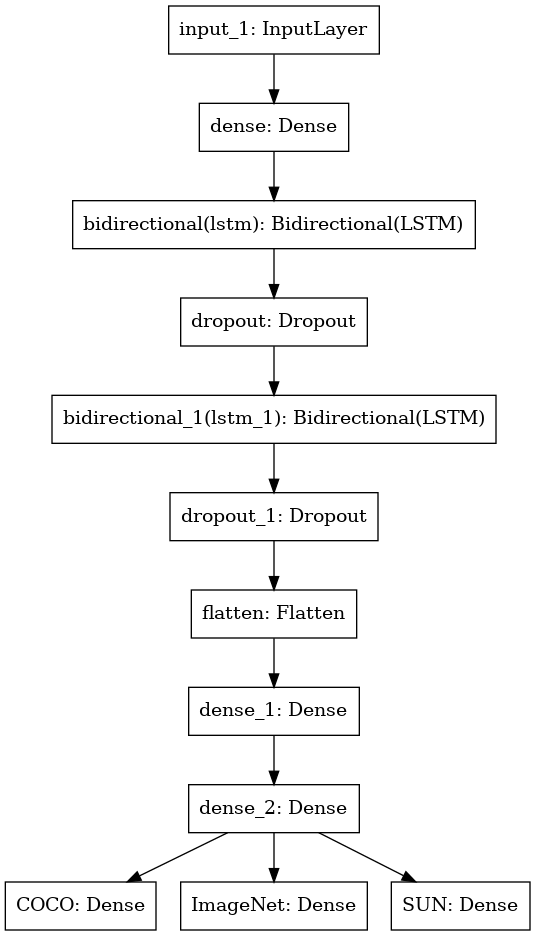

In [18]:
tf.keras.utils.plot_model(model)

In [19]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_loss', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss={
                  'COCO': 'binary_crossentropy', 
                  'ImageNet': 'binary_crossentropy', 
                  'SUN': 'binary_crossentropy'},
              loss_weights={
                  'COCO': 1, 
                  'ImageNet': 1, 
                  'SUN': 1},
              metrics={
                  'COCO': tf.keras.metrics.AUC(), 
                  'ImageNet': tf.keras.metrics.AUC(),
                  'SUN': tf.keras.metrics.AUC()})
    
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [20]:
model,history = train_model(model, x_train, [out1_train,out2_train,out3_train],x_test,[out1_test,out2_test,out3_test], save_to= './', epoch = 100) 

2023-02-09 05:03:21.354673: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
136/136 [==============================] - 39s 223ms/step - loss: 1.8643 - COCO_loss: 0.6719 - ImageNet_loss: 0.6682 - SUN_loss: 0.5131 - COCO_auc: 0.5710 - ImageNet_auc_1: 0.5581 - SUN_auc_2: 0.5633 - val_loss: 1.8159 - val_COCO_loss: 0.6647 - val_ImageNet_loss: 0.6565 - val_SUN_loss: 0.4893 - val_COCO_auc: 0.5915 - val_ImageNet_auc_1: 0.5916 - val_SUN_auc_2: 0.6105

Epoch 00001: val_loss improved from -inf to 1.81593, saving model to ./_best_model.h5
Epoch 2/100
136/136 [==============================] - 28s 204ms/step - loss: 1.7816 - COCO_loss: 0.6511 - ImageNet_loss: 0.6470 - SUN_loss: 0.4797 - COCO_auc: 0.6276 - ImageNet_auc_1: 0.6179 - SUN_auc_2: 0.6439 - val_loss: 1.7497 - val_COCO_loss: 0.6387 - val_ImageNet_loss: 0.6366 - val_SUN_loss: 0.4714 - val_COCO_auc: 0.6544 - val_ImageNet_auc_1: 0.6431 - val_SUN_auc_2: 0.6703

Epoch 00002: val_loss did not improve from 1.81593
Epoch 3/100
136/136 [==============================] - 28s 203ms/step - loss: 1.6801 - COCO_loss:

In [21]:
model = load_model('./_best_model.h5')

In [22]:
y_pred = model.predict(x_test)

In [23]:
# y_pred_vals = []
# for i in range(len(y_pred)):
#     vals = np.zeros(y_pred[0].shape)
#     for j in range(y_pred[0].shape[0]):
#         for k in range(y_pred[0].shape[1]):
#             if y_pred[i][j][k] < 0.5:
#                 vals[j][k] = 0
#             else:
#                 vals[j][k] = 1
#     y_pred_vals.append(vals)
    
# y_pred_vals

In [24]:
# m = tf.keras.metrics.Precision()
# m.update_state(y_pred[0],out1_test)
# m.result().numpy()

In [25]:
y_pred_vals = np.zeros(y_pred[0].shape)

for i in range(y_pred[0].shape[0]):
    for j in range(37):
        if y_pred[0][i][j] > y_pred[1][i][j] and y_pred[0][i][j] > y_pred[2][i][j]:
            y_pred_vals[i][j] = 0
        elif y_pred[1][i][j] > y_pred[0][i][j] and y_pred[1][i][j] > y_pred[2][i][j]:
            y_pred_vals[i][j] = 1
        else:
            y_pred_vals[i][j] = 2
            
y_pred_vals

array([[0., 0., 1., ..., 2., 1., 0.],
       [0., 1., 0., ..., 2., 0., 0.],
       [0., 1., 0., ..., 2., 0., 0.],
       ...,
       [0., 1., 0., ..., 2., 0., 0.],
       [0., 1., 0., ..., 2., 1., 0.],
       [0., 2., 0., ..., 2., 1., 0.]])

In [26]:
y_test_vals = np.zeros(y_pred[0].shape)

for i in range(y_pred[0].shape[0]):
    for j in range(37):
        if y_test[i][j][0] == 1:
            y_test_vals[i][j] = 0
        
        elif y_test[i][j][1] == 1:
            y_test_vals[i][j] = 1
        
        else:
            y_test_vals[i][j] = 2
            
y_test_vals

array([[2., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 2.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [2., 1., 0., ..., 0., 2., 2.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [27]:
metrics.confusion_matrix(y_test_vals.flatten(),y_pred_vals.flatten())

array([[8411, 4837,  458],
       [6050, 6502,  453],
       [3337, 2892,  471]])

In [28]:
print(metrics.classification_report(y_test_vals.flatten(), y_pred_vals.flatten(), digits=3))

              precision    recall  f1-score   support

         0.0      0.473     0.614     0.534     13706
         1.0      0.457     0.500     0.477     13005
         2.0      0.341     0.070     0.117      6700

    accuracy                          0.460     33411
   macro avg      0.423     0.395     0.376     33411
weighted avg      0.440     0.460     0.428     33411



In [29]:
true = 0
false = 0
for i in range(y_pred_vals.shape[0]):
    for j in range(y_pred_vals.shape[1]):
        if y_pred_vals[i][j] == y_test_vals[i][j]:
            true += 1
        else:
            false += 1
            
print(true)
print(false)
print(true/(true+false))

15384
18027
0.4604471581215767


In [30]:
y_test_vals.shape

(903, 37)

In [31]:
for i in range(y_test_vals.shape[0]):
    sample_test = y_test_vals[i]
    sample_pred = y_pred_vals[i]
    c = 0
    for j in range(37):
        if sample_test[j] == sample_pred[j]:
            c += 1
    if c >= 27:
        print(i)

515


In [43]:
ind = 515
sample_test = y_test_vals[ind]
sample_pred = y_pred_vals[ind]
print(sample_test)
print(sample_pred)

sample_x = []
for i in range(37):
    sample_x.append(x_test[ind][i][0])
    
sample_x = np.array(sample_x)
sample_x

[1. 1. 2. 2. 1. 0. 2. 0. 0. 1. 2. 0. 0. 1. 0. 2. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 2. 0. 0. 1. 0. 1. 1. 2. 1. 0.]
[0. 1. 0. 0. 1. 0. 2. 1. 0. 1. 2. 0. 0. 1. 1. 1. 2. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 2. 0. 0. 0. 0. 1. 1. 2. 1. 0.]


array([  4.06876051,   6.88628925,   2.43827691,  -7.9835256 ,
        -3.28651745,  -4.57967311,  -0.29589014,  -3.13055066,
        -6.17909839,   7.0011022 ,   0.59656406,  -1.73384688,
         1.24492529,  -0.61912174,  -2.84047908,  -2.58800142,
         0.39721378,  -5.10473647,   3.62100874,  -4.62887203,
        11.8424405 ,  -5.24033079,   6.72469799,   0.69892877,
        12.78762145,   0.55264469,  -9.9666157 ,   4.024971  ,
        10.62144566,  -8.19012068,  -2.77269838,  14.05266384,
        -6.55112452,   6.13086898, -10.72415344,  -6.76313963,
        -0.5119275 ])

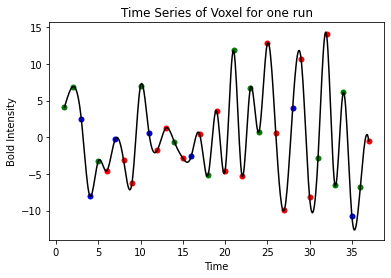

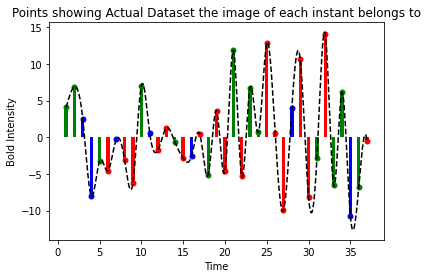

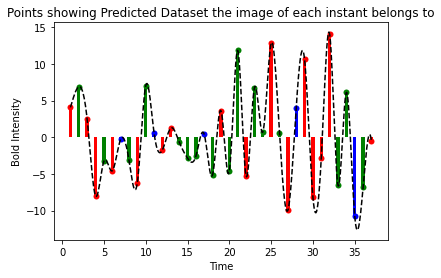

In [47]:
def graph_plot():
    
    col_test = []
    for i in range(37):
        if(sample_test[i] == 0):
            col_test.append('r')
        elif sample_test[i] == 1:
            col_test.append('g')
        else:
            col_test.append('b')
    
    x = np.array([i for i in range(1,38)])
    y = sample_x

    for i in range(len(x)):
        plt.scatter(x[i], y[i], c = col_test[i],linewidth = 0)
    
    X_Y_Spline = make_interp_spline(x, y)
 
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)

    plt.plot(X_, Y_,color='black')
    
    plt.title("Time Series of Voxel for one run")
    plt.xlabel("Time")
    plt.ylabel("Bold Intensity")
    plt.show()
    
    col_test = []
    for i in range(37):
        if(sample_test[i] == 0):
            col_test.append('r')
        elif sample_test[i] == 1:
            col_test.append('g')
        else:
            col_test.append('b')
    
    x = np.array([i for i in range(1,38)])
    y = sample_x

    for i in range(len(x)):
        plt.scatter(x[i], y[i], c = col_test[i],linewidth = 0)
    
    colors = []
    for i in range(37):
        if sample_test[i] == 0:
            colors.append('r')
        elif sample_test[i] == 1:
            colors.append('g')
        else:
            colors.append('b')
    
    plt.bar(x, y, color = colors,width = 0.4)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_,color='black',linestyle='dashed')
    
    plt.bar(x, y, color = colors,width = 0.4)
    plt.title("Points showing Actual Dataset the image of each instant belongs to")
    plt.xlabel("Time")
    plt.ylabel("Bold Intensity")
    plt.show()
    
    col_test = []
    for i in range(37):
        if(sample_pred[i] == 0):
            col_test.append('r')
        elif sample_pred[i] == 1:
            col_test.append('g')
        else:
            col_test.append('b')
            
    x = np.array([i for i in range(1,38)])
    y = sample_x

    for i in range(len(x)):
        plt.scatter(x[i], y[i], c = col_test[i],linewidth = 0)
    
    colors = []
    for i in range(37):
        if sample_pred[i] == 0:
            colors.append('r')
        elif sample_pred[i] == 1:
            colors.append('g')
        else:
            colors.append('b')
    
    X_Y_Spline = make_interp_spline(x, y)
 
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_,color='black',linestyle='dashed')
    
    plt.bar(x, y, color = colors,width = 0.4)
    
    plt.title("Points showing Predicted Dataset the image of each instant belongs to")
    plt.xlabel("Time")
    plt.ylabel("Bold Intensity")
    plt.show()
    
graph_plot()

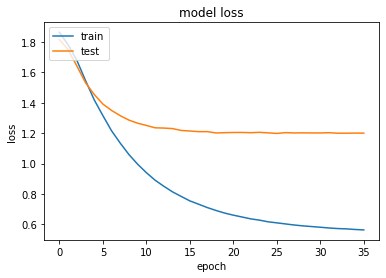

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
y_pred = model.predict(x_test)
y_pred[0].shape

(903, 37)

In [36]:
y_pred_vals.shape

(903, 37)

In [37]:
temp1_test = np.zeros((leny_test,37))
temp2_test = np.zeros((leny_test,37))
temp3_test = np.zeros((leny_test,37))

for i in range(y_pred_vals.shape[0]):
    for j in range(37):
        if y_pred_vals[i][j] == 0:
            temp1_test[i][j] = 1;
        elif y_pred_vals[i][j] == 1:
            temp2_test[i][j] = 1;
        elif y_pred_vals[i][j] == 2:
            temp3_test[i][j] = 1;
            
temp = [temp1_test,temp2_test,temp3_test]

In [38]:
temp

[array([[1., 1., 0., ..., 0., 0., 1.],
        [1., 0., 1., ..., 0., 1., 1.],
        [1., 0., 1., ..., 0., 1., 1.],
        ...,
        [1., 0., 1., ..., 0., 1., 1.],
        [1., 0., 1., ..., 0., 0., 1.],
        [1., 0., 1., ..., 0., 0., 1.]]),
 array([[0., 0., 1., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.]])]

In [39]:
def dice_coef(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    smooth = 0.0001
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

In [40]:
ans_dc = 0
max_dc = 0
for i in range(y_pred[0].shape[0]):
    dc = dice_coef(temp1_test[i],out1_test[i])
    ans_dc += dc
    if dc > max_dc:
        max_dc = dc
    
print(max_dc)
ans_dc/y_pred[0].shape[0]

0.8108113221315617


0.5323394989646343

In [41]:
ans_jc = 0
max_jc = 0
for i in range(y_pred[0].shape[0]):
    jc = jaccard_score(temp1_test[i],out1_test[i])
    ans_jc += jc
    if jc > max_jc:
        max_jc = jc
    
print(max_jc)
ans_jc/y_pred[0].shape[0]

0.6818181818181818


0.36915560446816564

In [42]:
jaccard_score(y_test_vals.flatten(), y_pred_vals.flatten(), average=None)

array([0.36422292, 0.3135912 , 0.06188412])